In [1]:
%pylab inline
import sys, os
sys.path.append(os.path.join('..','..'))
from genx import api

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
'Plugin' object has no attribute 'data'


In [2]:
model,optimizer=api.load('SuperAdam_SiO_full_res_calc.hgx')

Genx Model - compiled
File: C:\Users\glavic_a\py_projects\genx\genx\genx\examples\SuperAdam_SiO_full_res_calc.hgx
Parameters:
           Parameter        Value            Fit              Min              Max              Error           
           SiO.setD         1205.0           True             903.75           1506.25          -               
           SiO.setB         15.755099999999999 True             11.816324999999999 19.693875        -               
           SiO.setSigma     2.0              True             1.5              15.0             -               
           Sub.setSigma     2.0              True             1.5              15.0             -               
           inst.setI0       2.0              True             1.5              15.0             -               
           inst.setBeamw    0.2              True             0.15000000000000002 1.5              -               
           inst.setIbkg     0.0              True             0.0              1e-05            -               
           cp.setDlol       0.007            True             0.00525          0.00875          -               
           cp.setDtheta     0.04             True             0.03             0.05             -               
           inst.setTthoff   0.0              True             -0.05            0.05             -               
DataList([
           DataSet(name=SiO ref        , show=True, use=True, error=True),
           ])
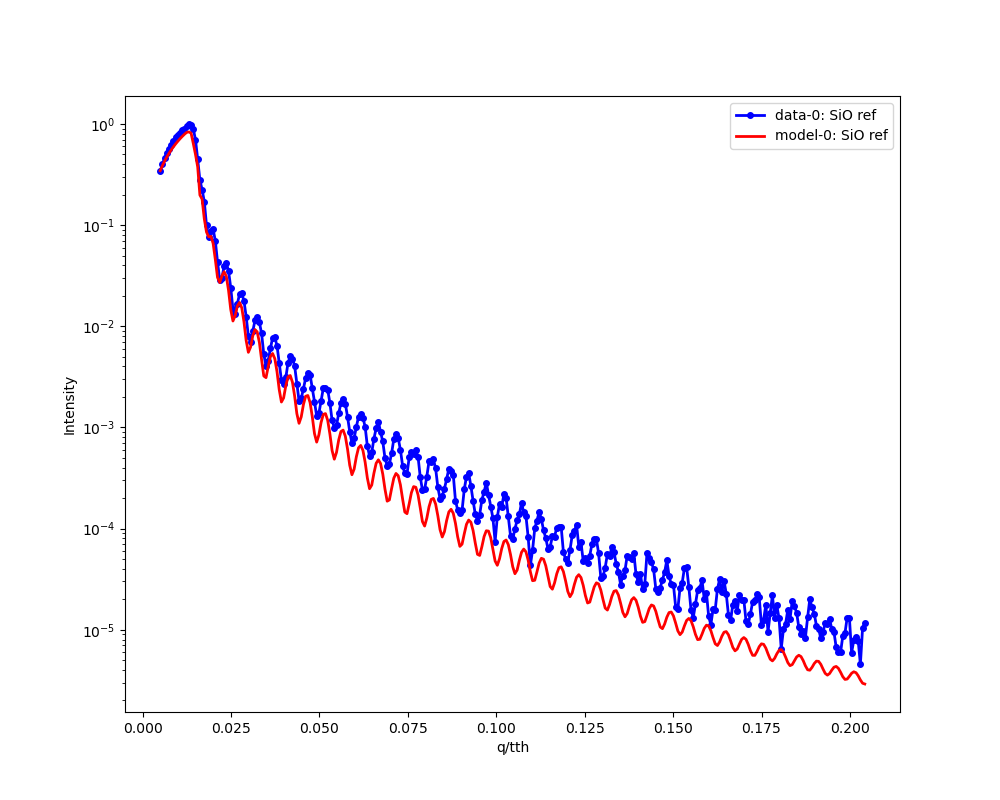

In [3]:
model

In [4]:
from IPython.display import Code
Code(model.script, language='python')

import models.spec_nx as model
from models.utils import UserVars, fp, fw, bc, bw
from numpy import *

# BEGIN Instrument DO NOT CHANGE
from models.utils import create_fp, create_fw
inst = model.Instrument(probe='neutron', wavelength=4.4, coords='q', I0=2, res=0.01, restype='full conv and varying res.', respoints=5, resintrange=2, beamw=0.2, footype='gauss beam', samplelen=50.0, incangle=0.0, pol='uu', Ibkg=0.0, tthoff=0.0,)
inst_fp = create_fp(inst.wavelength); inst_fw = create_fw(inst.wavelength)

fp.set_wavelength(inst.wavelength); fw.set_wavelength(inst.wavelength)
# END Instrument

# BEGIN Sample DO NOT CHANGE
Amb = model.Layer(sigma=0.0, dens=1.0, d=0.0, f=(1e-20+1e-20j), b=0, xs_ai=0.0, magn=0.0, magn_ang=0.0)
SiO = model.Layer(sigma=2, dens=0.026, d=1205, f=(1e-20+1e-20j), b=bc.Si + bc.O*2, xs_ai=0.0, magn=0.0, magn_ang=0.0)
Sub = model.Layer(sigma=2, dens=8/5.443**3, d=0.0, f=(1e-20+1e-20j), b=bc.Si, xs_ai=0.0, magn=0.0, magn_ang=0.0)

surf = model.Stack(Layers=[SiO], Repetitions = 1)

sample = model.Sample(Stacks = [surf], Ambient = Amb, Substrate = Sub)
# END Sample

# BEGIN Parameters DO NOT CHANGE
cp = UserVars()
cp.new_var('dtheta', 0.04)
cp.new_var('dlol', 0.007)
# END Parameters

SLD = []
def Sim(data):
    I = []
    SLD[:] = []
    # BEGIN Dataset 0 DO NOT CHANGE
    inst.setRes(sqrt((cp.dlol*data[0].x)**2 + (4*3.1415/4.4*cp.dtheta*pi/360)**2))
    d = data[0]
    I.append(sample.SimSpecular(d.x, inst))
    if _sim: SLD.append(sample.SimSLD(None, None, inst))
    # END Dataset 0
    return I

In [5]:
p=model.parameters.append('SiO.setDens', model)
p

Parameter:
           Parameter        Value            Fit              Min              Max              Error           
           SiO.setDens      0.026            False            0.0065           0.104            None

In [6]:
p.name, p.value, p.fit, p.min, p.max

('SiO.setDens', 0.026, False, 0.0065, 0.104)

In [7]:
p.fit=True
model.parameters

Parameters:
           Parameter        Value            Fit              Min              Max              Error           
           SiO.setD         1205.0           True             903.75           1506.25          -               
           SiO.setB         15.755099999999999 True             11.816324999999999 19.693875        -               
           SiO.setSigma     2.0              True             1.5              15.0             -               
           Sub.setSigma     2.0              True             1.5              15.0             -               
           inst.setI0       2.0              True             1.5              15.0             -               
           inst.setBeamw    0.2              True             0.15000000000000002 1.5              -               
           inst.setIbkg     0.0              True             0.0              1e-05            -               
           cp.setDlol       0.007            True             0.00525          0.00875          -               
           cp.setDtheta     0.04             True             0.03             0.05             -               
           inst.setTthoff   0.0              True             -0.05            0.05             -               
           SiO.setDens      0.026            True             0.0065           0.104            None

In [8]:
optimizer.opt.min_parameter_spread=0.1
optimizer

DiffEv Optimizer:
    Fitting:
        use_start_guess=True	use_boundaries=True
        use_autosave=False	autosave_interval=10
        save_all_evals=False	max_log_elements=100000
    Differential Evolution:
        km                             0.6
        kr                             0.6
        create_trial                   best_1_bin
        use_pop_mult=False	pop_mult=3	pop_size=50
        use_max_generations=False	max_generations=500	max_generation_mult=6
        min_parameter_spread           0.1
    Parallel processing:
        use_parallel_processing        False
        parallel_processes             2
        parallel_chunksize             10

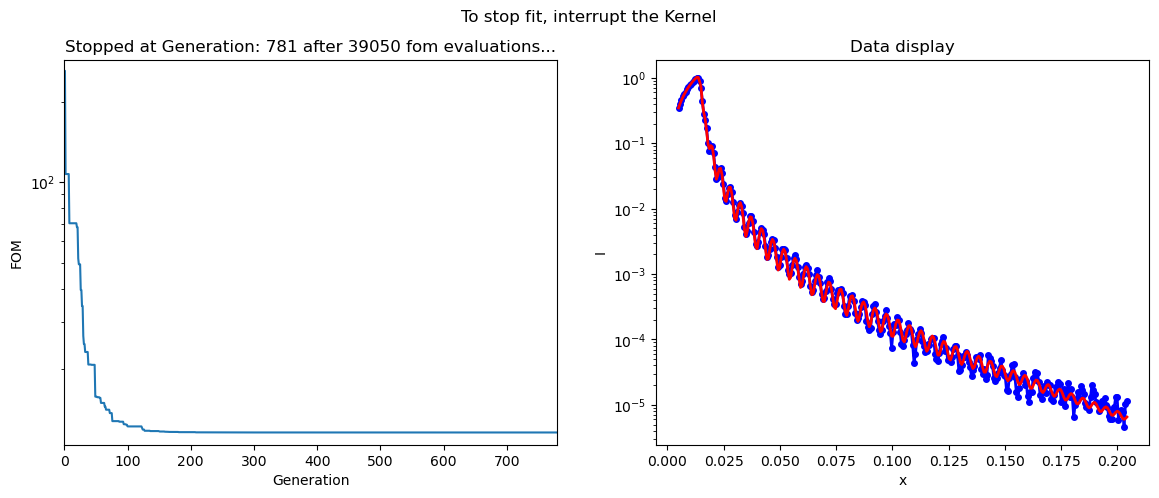

Stopped at Generation: 781 after 39050 fom evaluations...
If you want to update the model with the fit results, call api.fit_update(model, optimizer)


In [9]:
api.fit_notebook(model, optimizer)

In [10]:
api.fit_update(model, optimizer)

Genx Model - compiled
File: C:\Users\glavic_a\py_projects\genx\genx\genx\examples\SuperAdam_SiO_full_res_calc.hgx
Parameters:
           Parameter        Value            Fit              Min              Max              Error           
           SiO.setD         1217.0884960985143 True             903.75           1506.25          -               
           SiO.setB         14.003479919651012 True             11.816324999999999 19.693875        -               
           SiO.setSigma     4.91919682607001 True             1.5              15.0             -               
           Sub.setSigma     4.877671247224521 True             1.5              15.0             -               
           inst.setI0       12.14521374902504 True             1.5              15.0             -               
           inst.setBeamw    1.0014425831996308 True             0.15000000000000002 1.5              -               
           inst.setIbkg     2.7482926406270183e-12 True             0.0              1e-05            -               
           cp.setDlol       0.007366612346248592 True             0.00525          0.00875          -               
           cp.setDtheta     0.03491027015210667 True             0.03             0.05             -               
           inst.setTthoff   -0.035960669590079215 True             -0.05            0.05             -               
           SiO.setDens      0.026620505741710043 True             0.0065           0.104            None            
DataList([
           DataSet(name=SiO ref        , show=True, use=True, error=True),
           ])
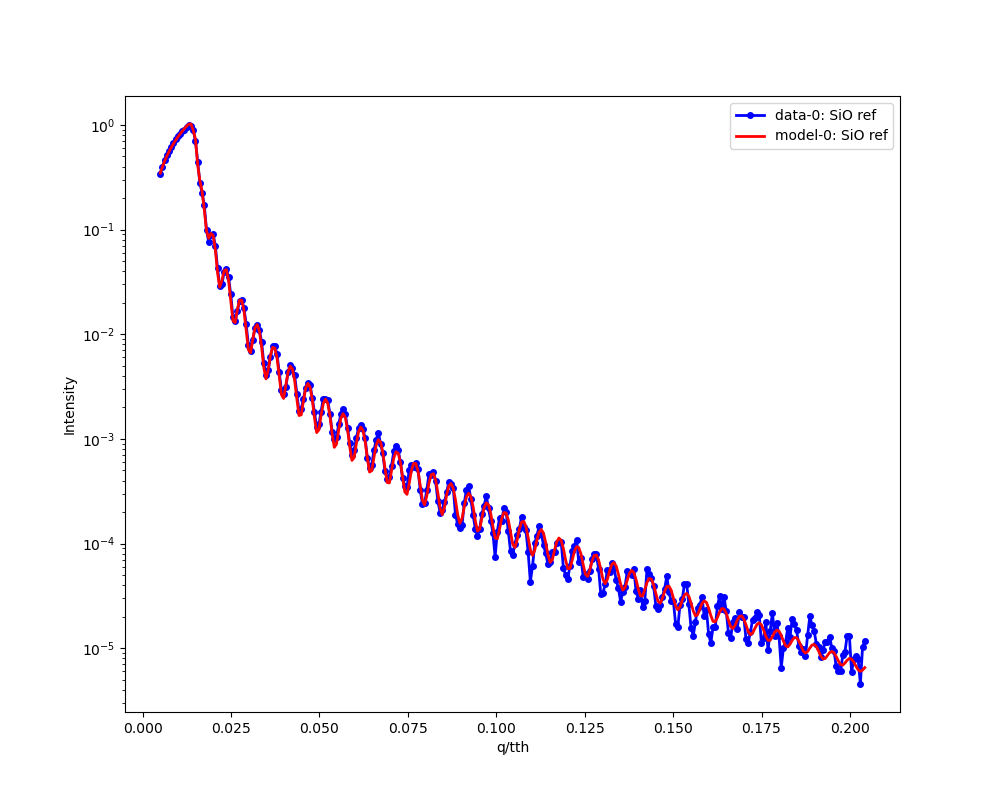

In [11]:
model

In [12]:
#api.save(r'testoutput.hgx', model, optimizer)